# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:

from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


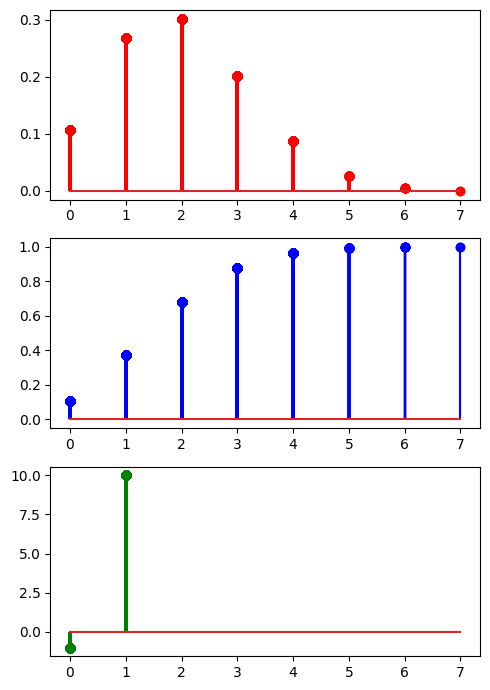

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [12]:
# TODO
from scipy.stats import norm

def pnorm(x, mu = 0, sigma = 1): #default values for standardised normal distribution with mean of 0 and std of 1
    """
    Calculates the probability density of the normal distribution
    """
    result = norm.pdf(x, loc = mu, scale = sigma) #loc=central tendency, scale = spread (so mean and standard deviation)

    return result

def cnorm(x, mu = 0, sigma = 1):
    """
    Calculates the cumulative from the normal distribution
    """
    result = norm.cdf(x, loc = mu, scale = sigma)

    return result

def rnorm(x, mu = 0, sigma = 1):
    """
    Generates random variables from the normal distribution
    """
    result = norm.rvs(loc=mu, scale=sigma, size=x)

    return result

def qnorm(p, mu = 0, sigma = 1): #given this is an inverse function, input parameter is p = probability, instead of x
    """Generates percentile points function (reverse of cdf)"""
    result = norm.ppf(q = p, loc = mu, scale = sigma)
    return result
#help(norm)
print(qnorm(0.7734,50,4))

53.00036333322511


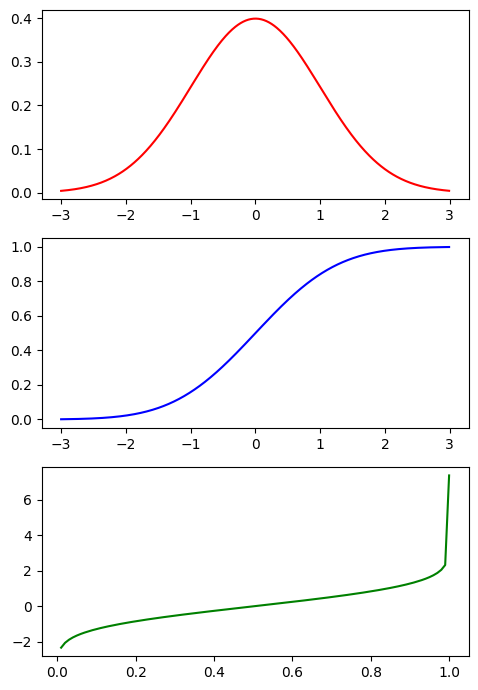

In [5]:
import matplotlib.pyplot as plt

np.random.seed(42)

mean = 0
standard_dev = 1
data = np.arange(-3*standard_dev,3*standard_dev,0.01) #all data stastically within 5 std of the mean

pdf = pnorm(data, mean, standard_dev)
cdf = cnorm(data, mean, standard_dev)
ppf = qnorm(data, mean, standard_dev)
#rvs = rnorm(data, mean, standard_dev)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pdf, "r-")
axis[1].plot(data, cdf, "b-")
axis[2].plot(data, ppf, "g-")
#axis[3].stem(data, rvs, "y-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
from scipy.stats import uniform

def puniform(n, mean = 0, std_dev = 1):
    """Returns a uniform probability density function"""
    return uniform.pdf(x = n, loc = mean, scale = std_dev)

def cuniform(n, mean = 0, std_dev = 1):
    """Returns a cumulative probabililty distribution function"""
    return uniform.cdf(x = n, loc = mean, scale = std_dev)

def quniform(n, mean = 0, std_dev = 1):
    """Returns percentage points function (inverse of CDF)"""
    result = uniform.ppf(q = n, loc = mean, scale = std_dev)
    return result

help(uniform.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



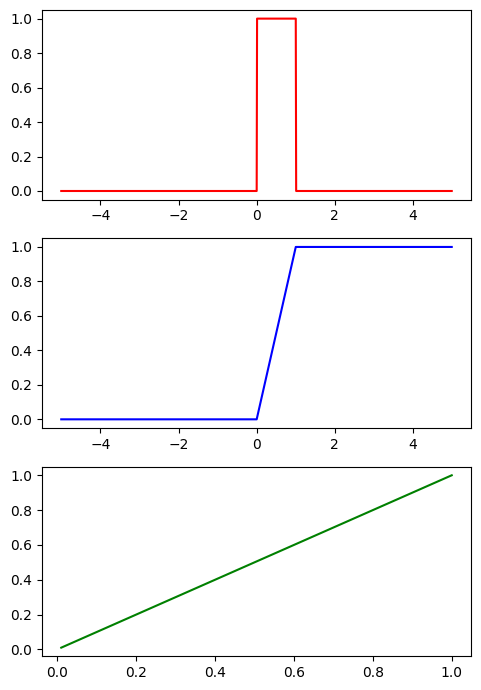

In [7]:
mean = 0
standard_dev = 1
data = np.arange(-5,5,0.01) #all data stastically within 5 std of the mean

pdf = puniform(data, mean, standard_dev)
cdf = cuniform(data, mean, standard_dev)
ppf = quniform(data, mean, standard_dev)
#rvs = rnorm(data, mean, standard_dev)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pdf, "r-")
axis[1].plot(data, cdf, "b-")
axis[2].plot(data, ppf, "g-")
#axis[3].stem(data, rvs, "y-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()